In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import main

In [13]:
result = main.run(total_periods = 5000000, alpha = 0.125, gamma = 0.95, beta = 1*1e-5,temp_max = 10, temp_min = 0.0001)

 23%|██▎       | 1169221/5000000 [06:56<22:45, 2805.54it/s] 


In [3]:
prices = np.array([2.02498094,1.69895138])
quantity = result.env.demand.get_quantity_demand(prices,result.env.quality_array)
(prices - result.env.marginal_cost_array)*quantity
quantity

array([0.17272573, 0.63639738])

In [14]:
result.print_results()

Name         Bertrand-Nash Price    Monopoly Price    Average Price    Bertrand-Nash Profit    Monopoly Profit    Average Profits    Normalised Profits
---------  ---------------------  ----------------  ---------------  ----------------------  -----------------  -----------------  --------------------
QLearning                1.47292           1.92498          1.44279                0.222925            0.33749           0.2098               -0.114557
QLearning                1.47292           1.92498          1.4428                 0.222925            0.33749           0.209794             -0.114611
Name       Description
---------  ---------------------------------------------------------------------------------------------
QLearning  : quality=2, mc=1, alpha=0.125, gamma=0.95, policy = (TimeDecliningExploration: beta = 1e-05)
QLearning  : quality=2, mc=1, alpha=0.125, gamma=0.95, policy = (TimeDecliningExploration: beta = 1e-05)




In [6]:
result.env.action_space

array([1.37292183, 1.41949748, 1.46607313, 1.51264878, 1.55922443,
       1.60580008, 1.65237573, 1.69895138, 1.74552703, 1.79210269,
       1.83867834, 1.88525399, 1.93182964, 1.97840529, 2.02498094])

# Price History of Agents

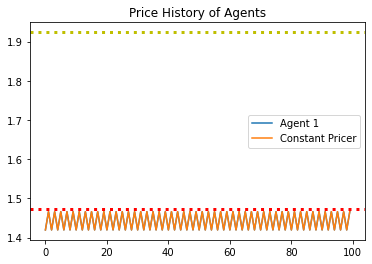

In [15]:
agent_1 = np.array(result.price_history)[-100:,0]
agent_2 = np.array(result.price_history)[-100:,1]
df = pd.DataFrame({'agent_1': agent_1, 'agent_2': agent_2})
plt.plot(df)
plt.axhline(y=1.924, linewidth=3,color='y',linestyle="dotted")
plt.axhline(y=1.472, linewidth=3,color='r',linestyle="dotted")
plt.legend(['Agent 1', "Constant Pricer"])
plt.title("Price History of Agents")
plt.show()

# Reward history of agents

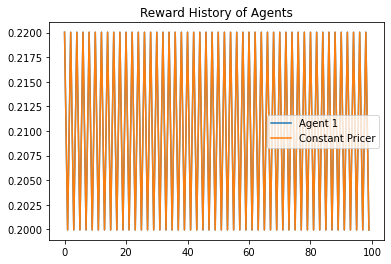

In [16]:
agent_1 = np.array(result.reward_history)[-100:,0]
agent_2 = np.array(result.reward_history)[-100:,1]
df = pd.DataFrame({'agent_1': agent_1, 'agent_2': agent_2})
plt.plot(df)
plt.legend(['Agent 1', "Constant Pricer"])
plt.title("Reward History of Agents")
plt.show()

# keys with highest Qvalue average sorted

In [13]:
actions = result.env.action_space
new_dict1 = {}
new_dict2={}
for a in actions:
    new_dict1[a]=0
    new_dict2[a]=0

for state,action_space in result.env.agents[0].Q.items():
    for a in actions:
        new_dict1[a] += action_space[a]
        
for key,value in new_dict1.items():
    new_dict1[key] = new_dict1[key]/(len(actions)**2)

"""
for state,action_space in result.env.agents[1].Q.items():
    for a in actions:
        new_dict2[a] += action_space[a]
        
for key,value in new_dict2.items():
    new_dict2[key] = new_dict2[key]/(len(actions)**2)
"""
print(sorted(new_dict1, key=lambda k: new_dict1[k],reverse=True))
#print(sorted(new_dict2, key=lambda k: new_dict2[k],reverse=True))

[1.4660731301561347, 1.6523757330810418, 1.6058000823498149, 1.5592244316185881, 1.5126487808873614, 1.6989513838122683, 1.3729218286936813, 1.7455270345434952, 1.7921026852747217, 1.419497479424908, 1.931829637468402, 1.8852539867371751, 1.9784052881996288, 1.8386783360059487, 2.0249809389308555]


In [14]:
actions = result.env.action_space
new_dict1 = {}
new_dict2={}
for a in actions:
    new_dict1[a]=0
    new_dict2[a]=0

for state,action_space in result.env.agents[0].Q.items():
    for a in actions:
        if action_space[a] != 0:
            print(state, a, action_space[a])

(1.3729218286936813, 1.6989513838122683, 1.3729218286936813, 1.6989513838122683) 1.3729218286936813 3.462908138597343
(1.3729218286936813, 1.6989513838122683, 1.3729218286936813, 1.6989513838122683) 1.419497479424908 4.092027301301694
(1.3729218286936813, 1.6989513838122683, 1.3729218286936813, 1.6989513838122683) 1.4660731301561347 6.352272745964035
(1.3729218286936813, 1.6989513838122683, 1.3729218286936813, 1.6989513838122683) 1.5126487808873614 4.282662139619644
(1.3729218286936813, 1.6989513838122683, 1.3729218286936813, 1.6989513838122683) 1.5592244316185881 4.87726179659687
(1.3729218286936813, 1.6989513838122683, 1.3729218286936813, 1.6989513838122683) 1.6058000823498149 4.398717932758257
(1.3729218286936813, 1.6989513838122683, 1.3729218286936813, 1.6989513838122683) 1.6523757330810418 4.264148618778733
(1.3729218286936813, 1.6989513838122683, 1.3729218286936813, 1.6989513838122683) 1.6989513838122683 3.3741111106515045
(1.3729218286936813, 1.6989513838122683, 1.37292182869368

(1.419497479424908, 1.6989513838122683, 1.931829637468402, 1.6989513838122683) 1.6523757330810418 2.9946481922703185
(1.419497479424908, 1.6989513838122683, 1.931829637468402, 1.6989513838122683) 1.6989513838122683 2.9290913880166407
(1.419497479424908, 1.6989513838122683, 1.931829637468402, 1.6989513838122683) 1.7455270345434952 6.173617328827245
(1.419497479424908, 1.6989513838122683, 1.931829637468402, 1.6989513838122683) 1.7921026852747217 2.9685396565444178
(1.419497479424908, 1.6989513838122683, 1.931829637468402, 1.6989513838122683) 1.8386783360059487 1.3800281029995793
(1.419497479424908, 1.6989513838122683, 1.931829637468402, 1.6989513838122683) 1.8852539867371751 1.8267871664073616
(1.419497479424908, 1.6989513838122683, 1.931829637468402, 1.6989513838122683) 1.931829637468402 1.6007873456159625
(1.419497479424908, 1.6989513838122683, 1.931829637468402, 1.6989513838122683) 1.9784052881996288 2.339797380660425
(1.419497479424908, 1.6989513838122683, 1.931829637468402, 1.698951

(1.5126487808873614, 1.6989513838122683, 1.8386783360059487, 1.6989513838122683) 1.8852539867371751 1.7984562370162966
(1.5126487808873614, 1.6989513838122683, 1.8386783360059487, 1.6989513838122683) 1.931829637468402 0.7227072712409901
(1.5126487808873614, 1.6989513838122683, 1.8386783360059487, 1.6989513838122683) 1.9784052881996288 0.2095063845685473
(1.5126487808873614, 1.6989513838122683, 1.8386783360059487, 1.6989513838122683) 2.0249809389308555 1.0156054723307704
(1.5126487808873614, 1.6989513838122683, 1.8852539867371751, 1.6989513838122683) 1.3729218286936813 3.2016813133132067
(1.5126487808873614, 1.6989513838122683, 1.8852539867371751, 1.6989513838122683) 1.419497479424908 4.420830840162027
(1.5126487808873614, 1.6989513838122683, 1.8852539867371751, 1.6989513838122683) 1.4660731301561347 4.077554229975742
(1.5126487808873614, 1.6989513838122683, 1.8852539867371751, 1.6989513838122683) 1.5126487808873614 6.3730277340991215
(1.5126487808873614, 1.6989513838122683, 1.885253986

(1.5592244316185881, 1.6989513838122683, 2.0249809389308555, 1.6989513838122683) 2.0249809389308555 2.1246586231774622
(1.6058000823498149, 1.6989513838122683, 1.3729218286936813, 1.6989513838122683) 1.3729218286936813 2.0002247925264918
(1.6058000823498149, 1.6989513838122683, 1.3729218286936813, 1.6989513838122683) 1.419497479424908 1.5895046070841832
(1.6058000823498149, 1.6989513838122683, 1.3729218286936813, 1.6989513838122683) 1.4660731301561347 3.379909914841439
(1.6058000823498149, 1.6989513838122683, 1.3729218286936813, 1.6989513838122683) 1.5126487808873614 2.3811077360680075
(1.6058000823498149, 1.6989513838122683, 1.3729218286936813, 1.6989513838122683) 1.5592244316185881 4.214044495245256
(1.6058000823498149, 1.6989513838122683, 1.3729218286936813, 1.6989513838122683) 1.6058000823498149 6.371283912904863
(1.6058000823498149, 1.6989513838122683, 1.3729218286936813, 1.6989513838122683) 1.6523757330810418 3.37510268505944
(1.6058000823498149, 1.6989513838122683, 1.37292182869

(1.6523757330810418, 1.6989513838122683, 1.7921026852747217, 1.6989513838122683) 2.0249809389308555 4.718071828933808
(1.6523757330810418, 1.6989513838122683, 1.8386783360059487, 1.6989513838122683) 1.3729218286936813 2.255350023190116
(1.6523757330810418, 1.6989513838122683, 1.8386783360059487, 1.6989513838122683) 1.419497479424908 3.915261924749334
(1.6523757330810418, 1.6989513838122683, 1.8386783360059487, 1.6989513838122683) 1.4660731301561347 3.875238924281796
(1.6523757330810418, 1.6989513838122683, 1.8386783360059487, 1.6989513838122683) 1.5126487808873614 4.0751714785477136
(1.6523757330810418, 1.6989513838122683, 1.8386783360059487, 1.6989513838122683) 1.5592244316185881 1.7230183554746819
(1.6523757330810418, 1.6989513838122683, 1.8386783360059487, 1.6989513838122683) 1.6058000823498149 6.369701327086688
(1.6523757330810418, 1.6989513838122683, 1.8386783360059487, 1.6989513838122683) 1.6523757330810418 4.0875296831877055
(1.6523757330810418, 1.6989513838122683, 1.83867833600

(1.7455270345434952, 1.6989513838122683, 1.419497479424908, 1.6989513838122683) 1.8852539867371751 4.859618768818748
(1.7455270345434952, 1.6989513838122683, 1.419497479424908, 1.6989513838122683) 1.931829637468402 5.561116087742739
(1.7455270345434952, 1.6989513838122683, 1.419497479424908, 1.6989513838122683) 1.9784052881996288 5.36366006573148
(1.7455270345434952, 1.6989513838122683, 1.419497479424908, 1.6989513838122683) 2.0249809389308555 6.249168157454219
(1.7455270345434952, 1.6989513838122683, 1.4660731301561347, 1.6989513838122683) 1.3729218286936813 4.611301294695344
(1.7455270345434952, 1.6989513838122683, 1.4660731301561347, 1.6989513838122683) 1.419497479424908 4.851955631289596
(1.7455270345434952, 1.6989513838122683, 1.4660731301561347, 1.6989513838122683) 1.4660731301561347 4.901753125172653
(1.7455270345434952, 1.6989513838122683, 1.4660731301561347, 1.6989513838122683) 1.5126487808873614 4.516117843747182
(1.7455270345434952, 1.6989513838122683, 1.4660731301561347, 1.

(1.8386783360059487, 1.6989513838122683, 1.419497479424908, 1.6989513838122683) 1.8386783360059487 3.0555225781977753
(1.8386783360059487, 1.6989513838122683, 1.419497479424908, 1.6989513838122683) 1.8852539867371751 2.6757739166259187
(1.8386783360059487, 1.6989513838122683, 1.419497479424908, 1.6989513838122683) 1.931829637468402 1.6082787666172917
(1.8386783360059487, 1.6989513838122683, 1.419497479424908, 1.6989513838122683) 1.9784052881996288 3.6132920892152187
(1.8386783360059487, 1.6989513838122683, 1.419497479424908, 1.6989513838122683) 2.0249809389308555 2.8148496265676037
(1.8386783360059487, 1.6989513838122683, 1.4660731301561347, 1.6989513838122683) 1.3729218286936813 4.635245381713137
(1.8386783360059487, 1.6989513838122683, 1.4660731301561347, 1.6989513838122683) 1.419497479424908 2.5853696743841943
(1.8386783360059487, 1.6989513838122683, 1.4660731301561347, 1.6989513838122683) 1.4660731301561347 4.602807551614972
(1.8386783360059487, 1.6989513838122683, 1.46607313015613

(1.8852539867371751, 1.6989513838122683, 1.7921026852747217, 1.6989513838122683) 1.7921026852747217 2.58048295139381
(1.8852539867371751, 1.6989513838122683, 1.7921026852747217, 1.6989513838122683) 1.8386783360059487 1.7425191819031125
(1.8852539867371751, 1.6989513838122683, 1.7921026852747217, 1.6989513838122683) 1.8852539867371751 2.6385574100985387
(1.8852539867371751, 1.6989513838122683, 1.7921026852747217, 1.6989513838122683) 1.931829637468402 2.3329665602790226
(1.8852539867371751, 1.6989513838122683, 1.7921026852747217, 1.6989513838122683) 1.9784052881996288 1.8135425397728024
(1.8852539867371751, 1.6989513838122683, 1.7921026852747217, 1.6989513838122683) 2.0249809389308555 3.188021819761778
(1.8852539867371751, 1.6989513838122683, 1.8386783360059487, 1.6989513838122683) 1.3729218286936813 2.0836574339271214
(1.8852539867371751, 1.6989513838122683, 1.8386783360059487, 1.6989513838122683) 1.419497479424908 1.7219404223187134
(1.8852539867371751, 1.6989513838122683, 1.8386783360

(1.9784052881996288, 1.6989513838122683, 1.4660731301561347, 1.6989513838122683) 1.5126487808873614 5.045579350637458
(1.9784052881996288, 1.6989513838122683, 1.4660731301561347, 1.6989513838122683) 1.5592244316185881 6.354808032318254
(1.9784052881996288, 1.6989513838122683, 1.4660731301561347, 1.6989513838122683) 1.6058000823498149 5.065683208204647
(1.9784052881996288, 1.6989513838122683, 1.4660731301561347, 1.6989513838122683) 1.6523757330810418 3.712998399238496
(1.9784052881996288, 1.6989513838122683, 1.4660731301561347, 1.6989513838122683) 1.6989513838122683 3.477059580625472
(1.9784052881996288, 1.6989513838122683, 1.4660731301561347, 1.6989513838122683) 1.7455270345434952 3.4528465642339974
(1.9784052881996288, 1.6989513838122683, 1.4660731301561347, 1.6989513838122683) 1.7921026852747217 4.347950886068411
(1.9784052881996288, 1.6989513838122683, 1.4660731301561347, 1.6989513838122683) 1.8386783360059487 2.9858394490224778
(1.9784052881996288, 1.6989513838122683, 1.46607313015

(2.0249809389308555, 1.6989513838122683, 1.931829637468402, 1.6989513838122683) 1.7455270345434952 1.474000296101469
(2.0249809389308555, 1.6989513838122683, 1.931829637468402, 1.6989513838122683) 1.7921026852747217 1.5275763476932653
(2.0249809389308555, 1.6989513838122683, 1.931829637468402, 1.6989513838122683) 1.8386783360059487 3.1035370190252634
(2.0249809389308555, 1.6989513838122683, 1.931829637468402, 1.6989513838122683) 1.8852539867371751 2.733087542777452
(2.0249809389308555, 1.6989513838122683, 1.931829637468402, 1.6989513838122683) 1.931829637468402 2.256730605389092
(2.0249809389308555, 1.6989513838122683, 1.931829637468402, 1.6989513838122683) 1.9784052881996288 1.694463193765333
(2.0249809389308555, 1.6989513838122683, 1.931829637468402, 1.6989513838122683) 2.0249809389308555 2.0316823618935107
(2.0249809389308555, 1.6989513838122683, 1.9784052881996288, 1.6989513838122683) 1.3729218286936813 0.9860901667649388
(2.0249809389308555, 1.6989513838122683, 1.9784052881996288,

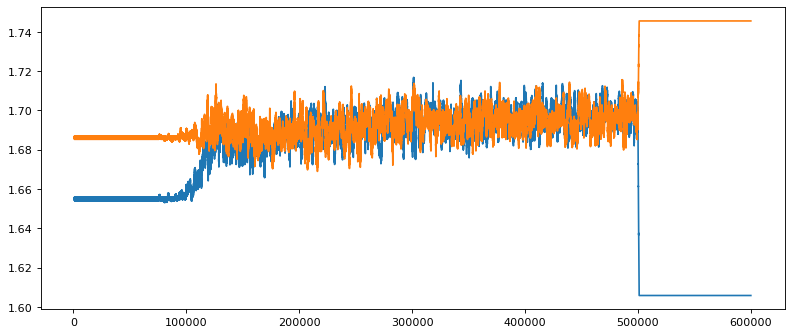

In [63]:

x =np.linspace(0,len(np.array(result.price_history)),num=len(np.array(result.price_history)))
agent_1 = np.array(result.price_history)[:,0]
agent_2 = np.array(result.price_history)[:,1]

df = pd.DataFrame({'agent_1': agent_1, 'agent_2': agent_2})
plt.figure(figsize=(12, 5), dpi=80)
plt.plot(df['agent_1'].rolling(1000).mean())
plt.plot(df['agent_2'].rolling(1000).mean())

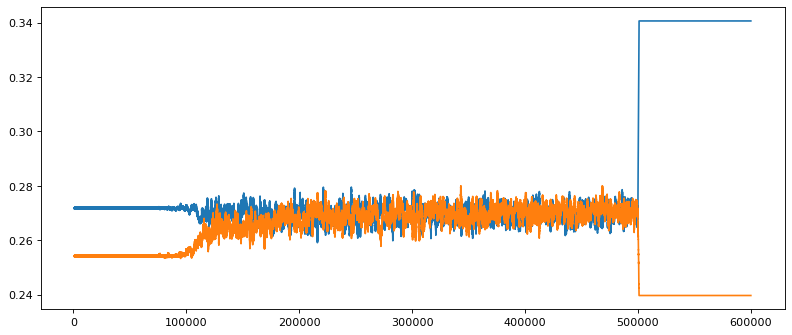

In [28]:

x =np.linspace(0,len(np.array(result.reward_history)),num=len(np.array(result.reward_history)))
agent_1 = np.array(result.reward_history)[:,0]
agent_2 = np.array(result.reward_history)[:,1]

df = pd.DataFrame({'agent_1': agent_1, 'agent_2': agent_2})
plt.figure(figsize=(12, 5), dpi=80)
plt.plot(df['agent_1'].rolling(1000).mean())
plt.plot(df['agent_2'].rolling(1000).mean())

# Average Normalised Profits for different number of firms Box-plot

In [17]:

two_firm = []
three_firm = []
four_firm = []

for i in range(20):
    two_firm.append(main.run(num_agents=2,alpha = 0.125,beta = 1*1e-5,temp_max = 3, temp_min = 0.0001).normalised_profits.mean())
for i in range(20):
    three_firm.append(main.run(num_agents=3,alpha = 0.125,beta = 1*1e-5,temp_max = 3, temp_min = 0.0001).normalised_profits.mean())
for i in range(20):
    four_firm.append(main.run(num_agents=4,alpha = 0.125,beta = 1*1e-5,temp_max = 3, temp_min = 0.0001).normalised_profits.mean())


100%|██████████| 1000000/1000000 [05:22<00:00, 3100.56it/s]


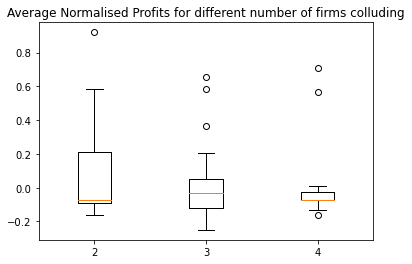

In [18]:
df = pd.DataFrame({"2":two_firm, "3":three_firm, "4":four_firm})

plt.title("Average Normalised Profits for different number of firms colluding")
plt.boxplot(df)
plt.xticks([1, 2, 3], ["2","3","4"])
plt.show()

# Average Normalised Profits for different number of firms Box-plot using Boltzmann

In [19]:

two_firm = []
three_firm = []
four_firm = []

for i in range(10):
    two_firm.append(main.run(num_agent=2).normalised_profits.mean())
for i in range(10):
    three_firm.append(main.run(num_agent=3).normalised_profits.mean())
for i in range(10):
    four_firm.append(main.run(num_agent=4).normalised_profits.mean())

 85%|████████▍ | 846772/1000000 [04:35<00:49, 3076.92it/s]


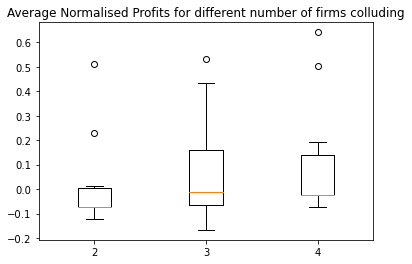

In [20]:
df = pd.DataFrame({"2":two_firm, "3":three_firm, "4":four_firm})

plt.title("Average Normalised Profits for different number of firms colluding")
plt.boxplot(df)
plt.xticks([1, 2, 3], ["2","3","4"])
plt.show()

# Heat Map of Normalised Profits for grid values of $\alpha$ and $\beta$

In [ ]:
matrix = []
for alpha in np.arange(0.01,0.2,0.01):
    lst = []
    for beta in np.arange(0.01,2,0.02):
        lst.append(main.run(alpha = alpha, beta = beta*1e-5).normalised_profits.mean())
    matrix.append(lst)

100%|██████████| 1000000/1000000 [05:09<00:00, 3230.40it/s]


 43%|████▎     | 430692/1000000 [02:07<02:48, 3386.73it/s]


 25%|██▍       | 248760/1000000 [01:13<03:36, 3468.51it/s]

In [21]:
alpha_names = [round(alpha,2) for alpha in np.arange(0.01,0.2,0.01)]
beta_names = [round(beta,2) for beta in np.arange(0.01,2,0.02)]
num_ticks = 5
yticks = np.linspace(0, len(alpha_names) - 1, num_ticks, dtype=np.int)
yticklabels = [alpha_names[idx] for idx in yticks]

df = pd.DataFrame(matrix, index=alpha_names, columns=beta_names)
heatmap_result = sns.heatmap(df, yticklabels=yticklabels)
heatmap_result.set_yticks(yticks)
heatmap_result.invert_yaxis()

plt.xlabel(r'$\beta$')
plt.ylabel(r'$\alpha$')
plt.title(r'Average normalised profits for a Grid of Values of $\alpha$ and $\beta$')

<ipython-input-21-1892dc5e3da0>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  yticks = np.linspace(0, len(alpha_names) - 1, num_ticks, dtype=np.int)


NameError: name 'matrix' is not defined